# Hyper-Aging Simulations

3 participants: parent, grandparent, child
Spurious level at resting state in function of the alpha-peak:
- parent: 12 Hz
- grandparent: 8 Hz
- child: 7 Hz
  
Coupling // predictive coding:
- parent <- grandparent: 0.9
- parent <- child: 0.9
- child <- parent: 0.4
- child <- grandparent: 0.5
- grandparent <- parent: 0.6
- grandparent <- child: 0.7

Simulate:
- 3 parents
- 3 grandparents
- 3 children
- mixed case
Metrics: PLV, CCOR, wPLI

Code ressources: https://github.com/laszukdawid/Dynamical-systems

## Load the libraries

In [1]:
from tqdm import trange
import numpy as np
from kuramoto import Kuramoto
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

nsim = 2000

## Simple triadic simulation

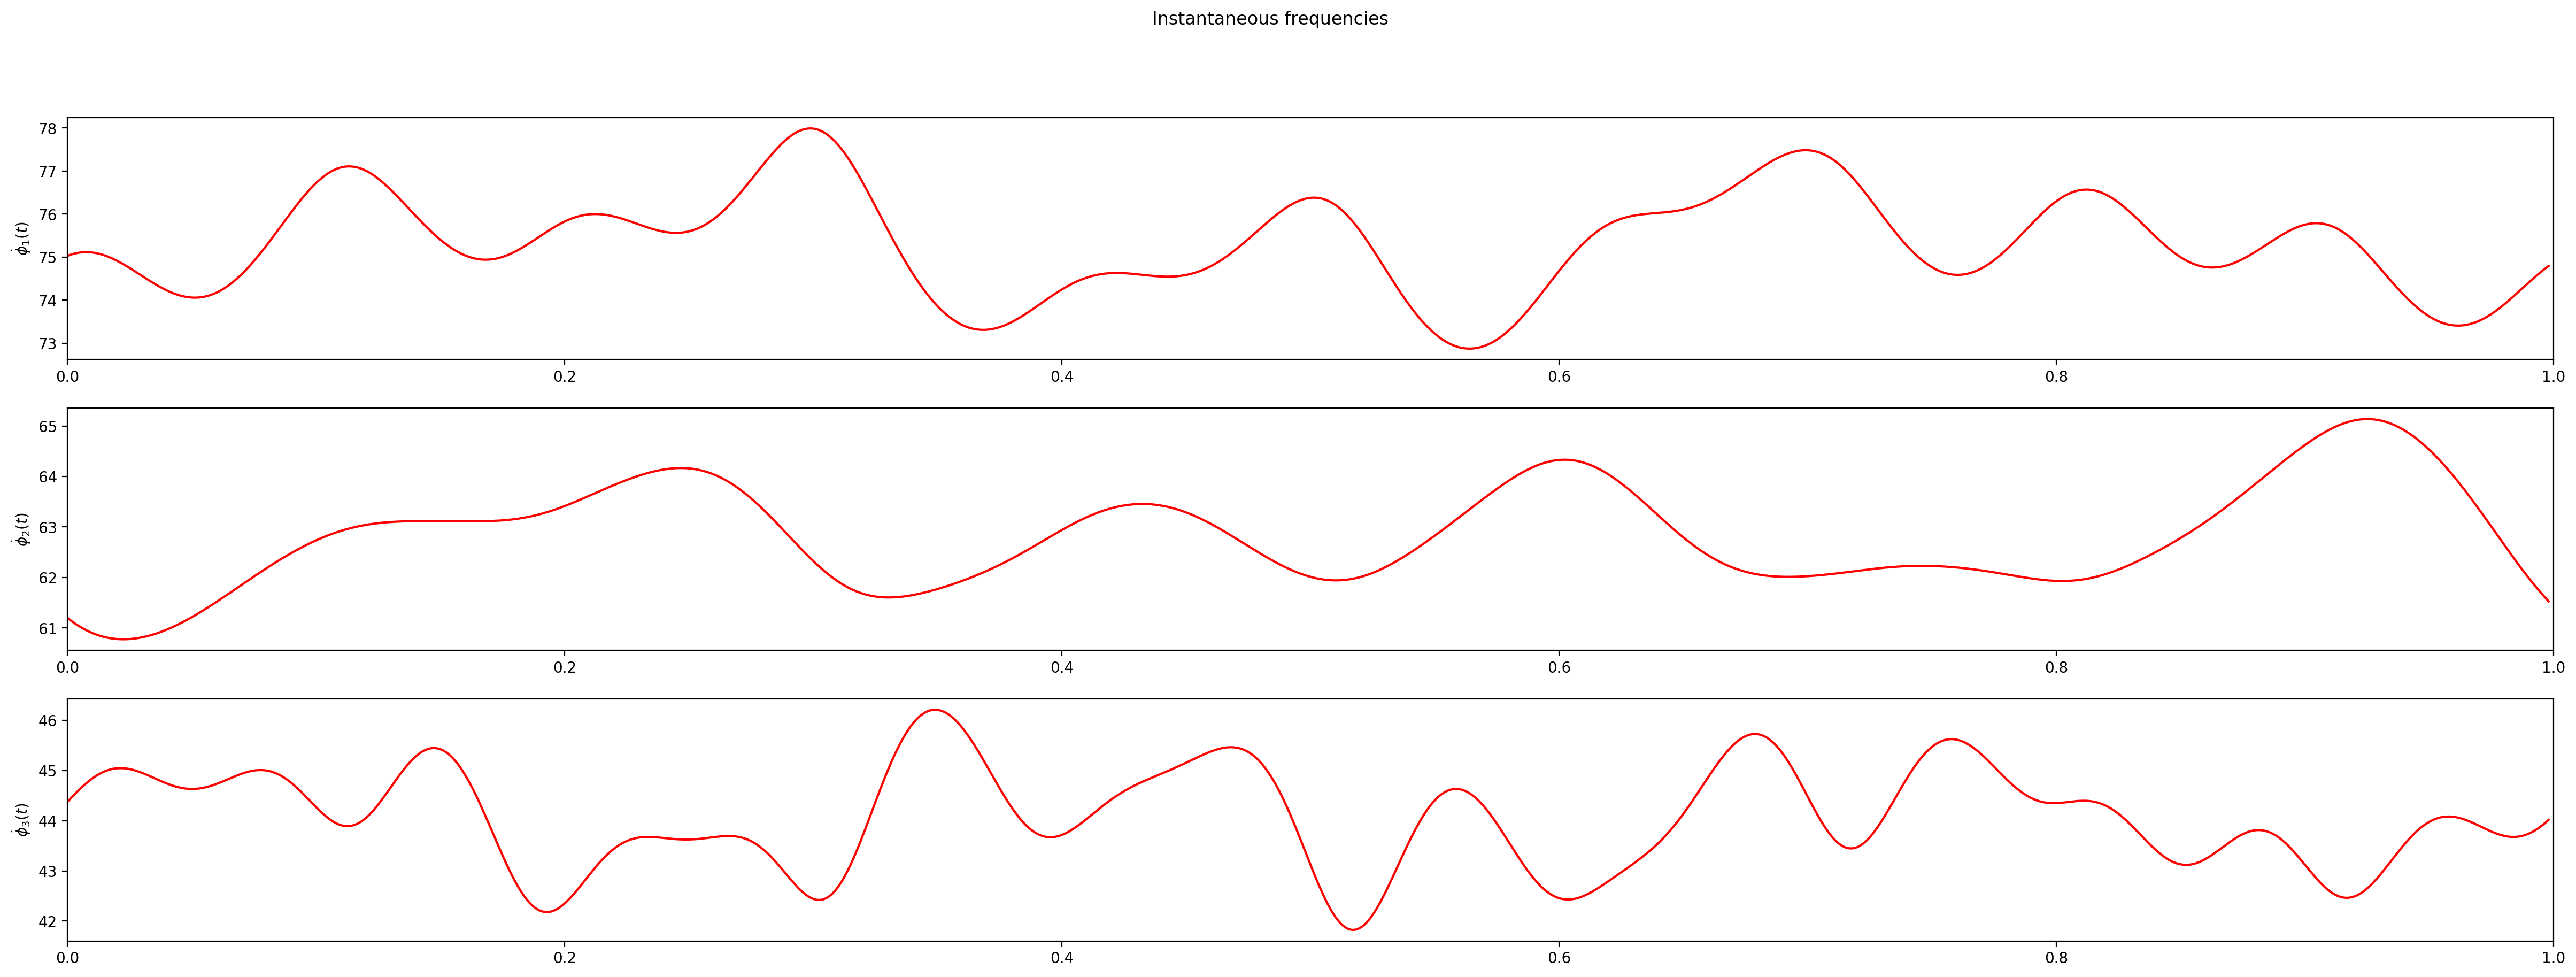

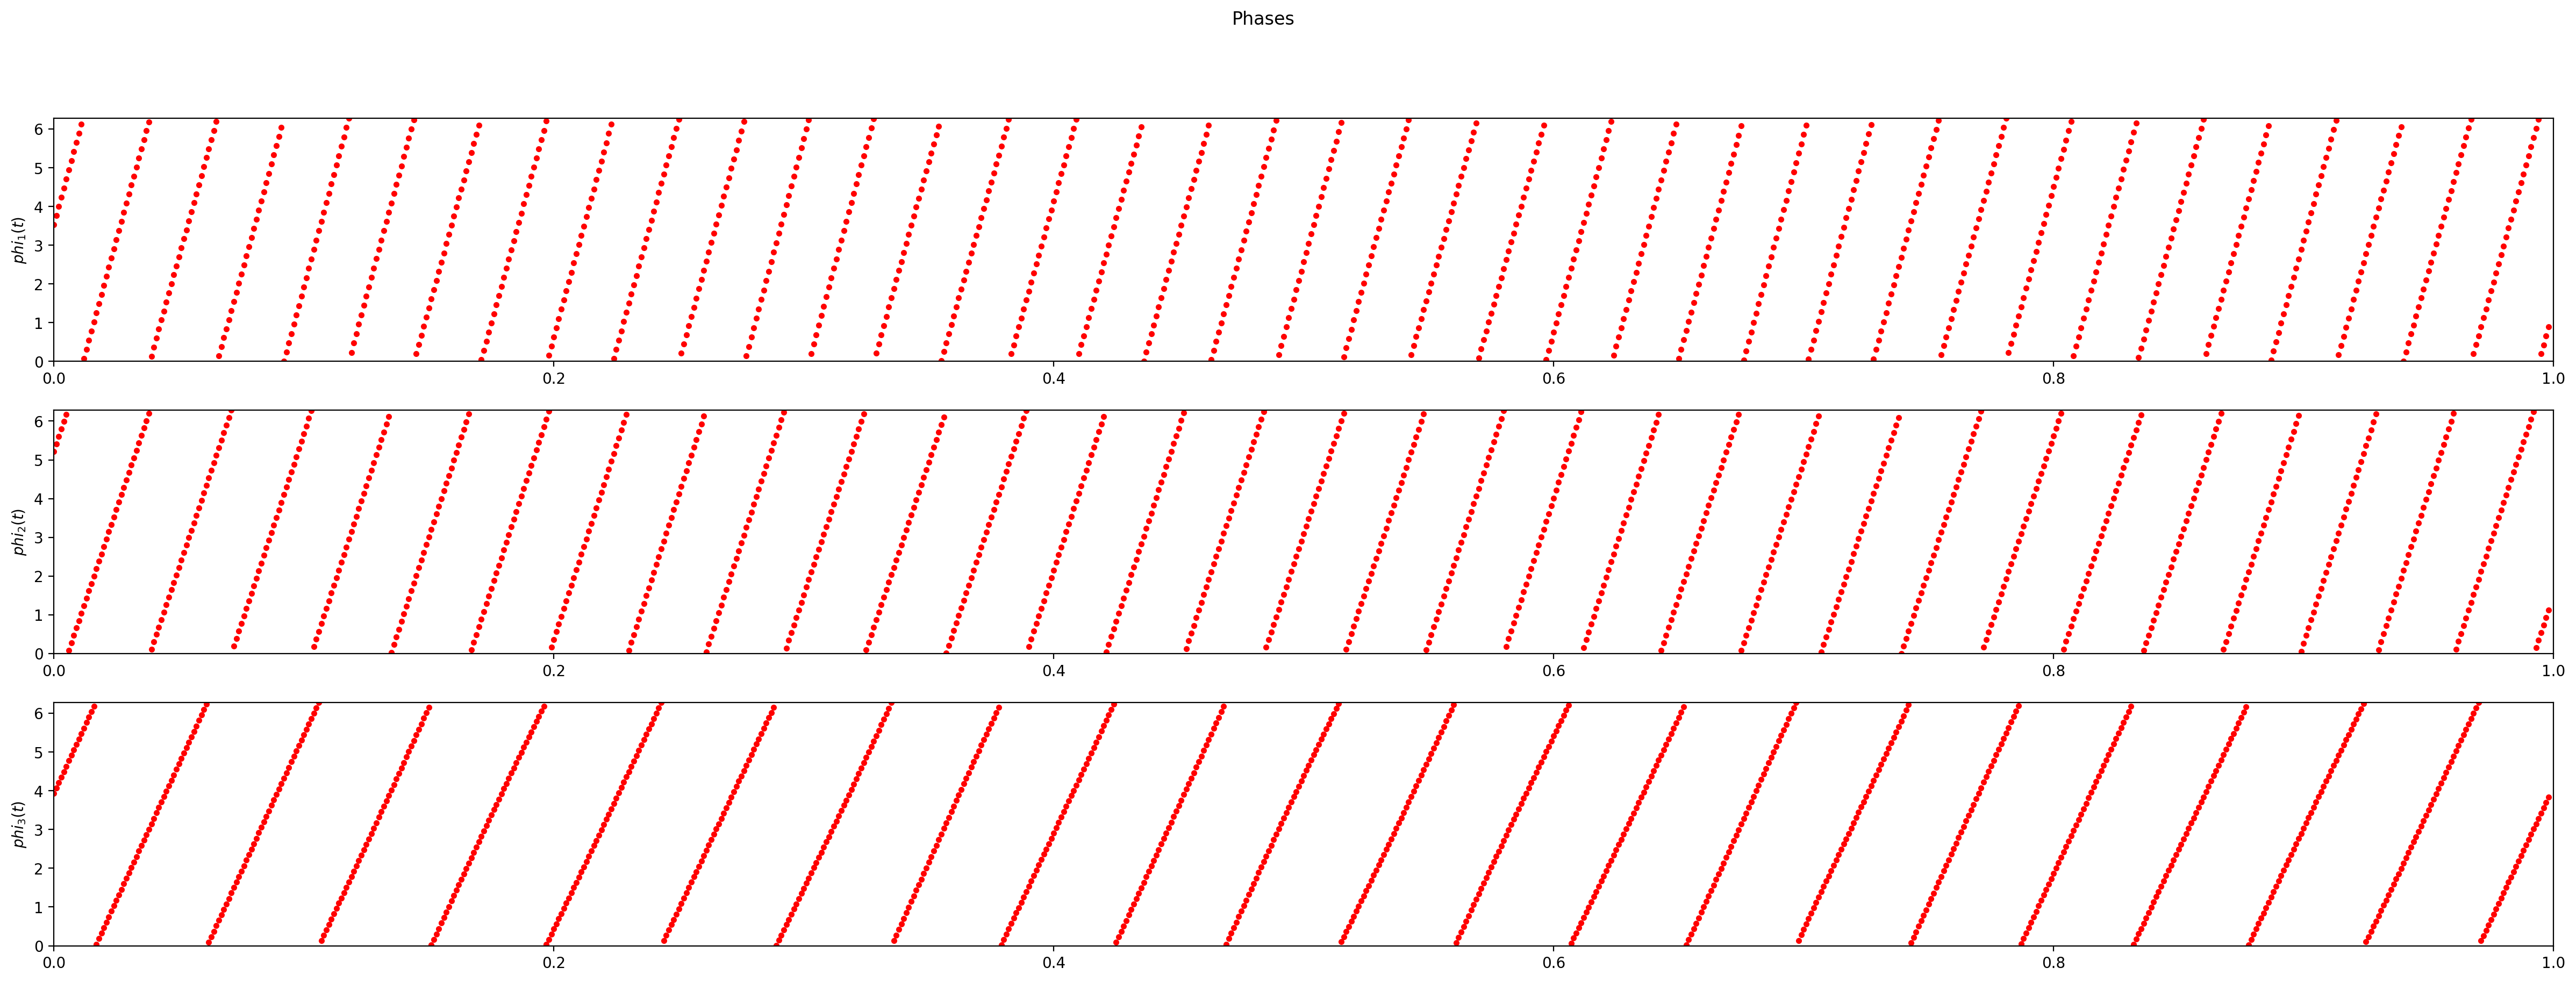

Average Phase Locking Values (PLV):
- Parent-Grandparent = 0.03115478879836508
- Parent-Child = 0.010628190191882343
- Child-Grandparent = 0.04735104844998222


In [2]:
t0, t1, dt = 0, 1, 0.001
T = np.arange(t0, t1, dt)

W = [2*np.pi*12,
     2*np.pi*10,
     2*np.pi*7]

K = np.array([[0.0, 0.9, 0.9],
              [0.7, 0.0, 0.8],
              [0.5, 0.6, 0.0]])

Y0 = np.random.rand(len(W))*2*np.pi

init_params = {'W':W, 'K':K, 'Y0':Y0}

kuramoto = Kuramoto(init_params)
kuramoto.noise = 'normal'
odePhi = kuramoto.solve(T)
odeT = T[:-1]

##########################################
# Plot the phases
plt.figure(figsize=(30, 10))
for comp in range(len(W)):
    plt.subplot(len(W),1,comp+1)
    plt.plot(odeT, np.diff(odePhi[comp])/dt,'r')
    plt.ylabel('$\dot\phi_%i(t)$'%(comp+1))
    plt.xlim([t0, t1])
plt.suptitle("Instantaneous frequencies")
plt.show()

# Plot the phases
plt.figure(figsize=(30, 10))
for comp in range(len(W)):
    plt.subplot(len(W),1,comp+1)
    plt.plot(odeT, odePhi[comp][:-1] % 2*np.pi,'.r')
    plt.ylabel('$phi_%i(t)$'%(comp+1))
    plt.ylim([0, 2*np.pi])
    plt.xlim([t0, t1])
plt.suptitle("Phases")
plt.show()

print("Average Phase Locking Values (PLV):")
print(f"- Parent-Grandparent = {np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[1]))))/ len(odePhi[0])}")
print(f"- Parent-Child = {np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[2]))))/ len(odePhi[0])}")
print(f"- Child-Grandparent = {np.abs(np.sum(np.exp(1j * (odePhi[1] - odePhi[2]))))/ len(odePhi[0])}")

## Triadic simulation #1 12-8-7

In [19]:
def simulation3():
    t0, t1, dt = 0, 60, 0.01
    T = np.arange(t0, t1, dt)
    W = [2*np.pi*(np.random.randn()+12),
         2*np.pi*(np.random.randn()+8),
         2*np.pi*(np.random.randn()+7)]
    K = np.array([[0.0, 0.9, 0.9],
                  [0.7, 0.0, 0.7],
                  [0.5, 0.5, 0.0]])
    Y0 = np.random.rand(len(W))*2*np.pi
    init_params = {'W': W, 'K': K, 'Y0': Y0}
    kuramoto = Kuramoto(init_params)
    kuramoto.noise = 'normal'
    odePhi = kuramoto.solve(T)
    odeT = T[:-1]
    return np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[1])))) / len(odePhi[0]), np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[2])))) / len(odePhi[0]), np.abs(np.sum(np.exp(1j * (odePhi[1] - odePhi[2])))) / len(odePhi[0])


def simulation1(freq, coupling):
    t0, t1, dt = 0, 60, 0.01
    T = np.arange(t0, t1, dt)
    W = [2*np.pi*freq[0],
         2*np.pi*freq[1],
         2*np.pi*freq[2]]
    K = np.array([[0.0, coupling, coupling],
                  [coupling, 0.0, coupling],
                  [coupling, coupling, 0.0]])
    Y0 = np.random.rand(len(W))*2*np.pi
    init_params = {'W': W, 'K': K, 'Y0': Y0}
    kuramoto = Kuramoto(init_params)
    kuramoto.noise = 'normal'
    odePhi = kuramoto.solve(T)
    odeT = T[:-1]
    return np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[1])))) / len(odePhi[0]), np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[2])))) / len(odePhi[0]), np.abs(np.sum(np.exp(1j * (odePhi[1] - odePhi[2])))) / len(odePhi[0])


results1 = []
for sim in trange(nsim):
    adt_old, adt_kid, old_kid = simulation3()
    adt_adt = simulation1(freq=(np.random.randn()+12, np.random.randn()+12, np.random.randn()+12), coupling=0.9)
    old_old = simulation1(freq=(np.random.randn()+8, np.random.randn()+8, np.random.randn()+8), coupling=0.7)
    kid_kid = simulation1(freq=(np.random.randn()+7, np.random.randn()+7, np.random.randn()+7), coupling=0.5)
    results1.append([adt_old, adt_kid, old_kid, np.mean(adt_adt), np.mean(old_old), np.mean(kid_kid)])

df1 = pd.DataFrame(results1, columns=['parent - grandparent [in triad parent-grandparent-child]',
                                      'parent - child [in triad parent-grandparent-child]',
                                      'grandparent - child [in triad parent-grandparent-child]',
                                      'parents - parents [in triad of 3 parents]',
                                      '3 grandparents [in triad of 3 grandparents]',
                                      '3 children [in triad of 3 children]'])

100%|██████████| 2000/2000 [4:57:32<00:00,  8.93s/it]  


/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


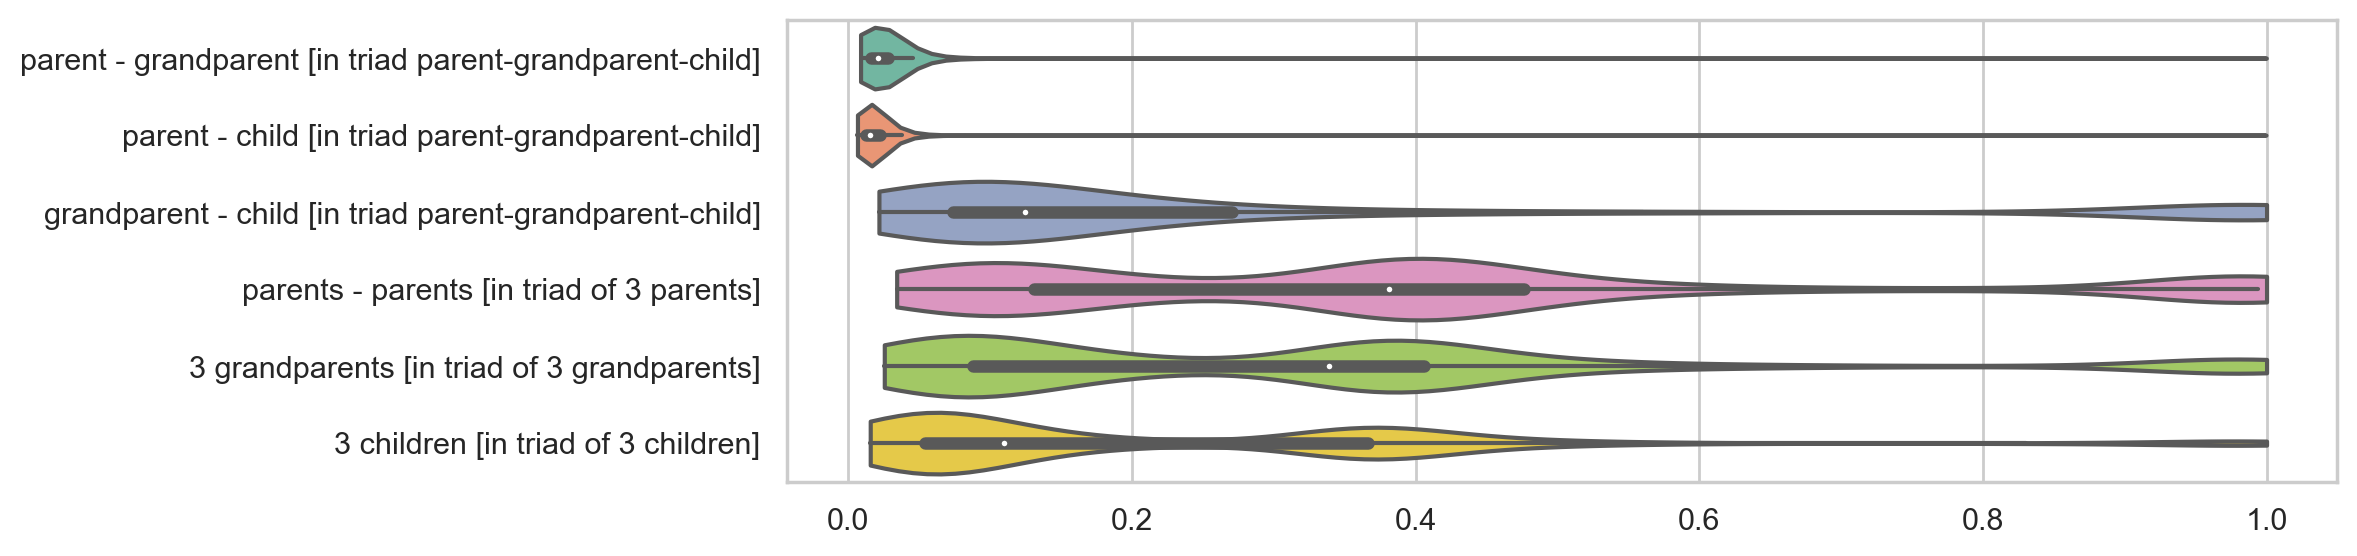

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 3))
ax = sns.violinplot(data=df1, orient='h', palette="Set2",
                    cut=0, width=0.8, scale='width')
plt.savefig('violinplot1.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Triadic simulation #2: 12-10-7

In [21]:
def simulation3():
    t0, t1, dt = 0, 60, 0.01
    T = np.arange(t0, t1, dt)
    W = [2*np.pi*(np.random.randn()+12),
         2*np.pi*(np.random.randn()+10),
         2*np.pi*(np.random.randn()+7)]
    K = np.array([[0.0, 0.9, 0.9],
                  [0.7, 0.0, 0.7],
                  [0.5, 0.5, 0.0]])
    Y0 = np.random.rand(len(W))*2*np.pi
    init_params = {'W':W, 'K':K, 'Y0':Y0}
    kuramoto = Kuramoto(init_params)
    kuramoto.noise = 'normal'
    odePhi = kuramoto.solve(T)
    odeT = T[:-1]
    return np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[1]))))/ len(odePhi[0]), np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[2]))))/ len(odePhi[0]), np.abs(np.sum(np.exp(1j * (odePhi[1] - odePhi[2]))))/ len(odePhi[0])

def simulation1(freq, coupling):
    t0, t1, dt = 0, 60, 0.01
    T = np.arange(t0, t1, dt)
    W = [2*np.pi*freq[0],
         2*np.pi*freq[1],
         2*np.pi*freq[2]]
    K = np.array([[0.0, coupling, coupling],
                  [coupling, 0.0, coupling],
                  [coupling, coupling, 0.0]])
    Y0 = np.random.rand(len(W))*2*np.pi
    init_params = {'W':W, 'K':K, 'Y0':Y0}
    kuramoto = Kuramoto(init_params)
    kuramoto.noise = 'normal'
    odePhi = kuramoto.solve(T)
    odeT = T[:-1]
    return np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[1])))) / len(odePhi[0]), np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[2])))) / len(odePhi[0]), np.abs(np.sum(np.exp(1j * (odePhi[1] - odePhi[2])))) / len(odePhi[0])

results2 = []
for sim in trange(nsim):
    adt_old, adt_kid, old_kid = simulation3()
    adt_adt = simulation1(freq=(np.random.randn()+12, np.random.randn()+12, np.random.randn()+12), coupling=0.9)
    old_old = simulation1(freq=(np.random.randn()+10, np.random.randn()+10, np.random.randn()+10), coupling=0.7)
    kid_kid = simulation1(freq=(np.random.randn()+7, np.random.randn()+7, np.random.randn()+7), coupling=0.5)
    results2.append([adt_old, adt_kid, old_kid, np.mean(adt_adt), np.mean(old_old), np.mean(kid_kid)])


df2 = pd.DataFrame(results2, columns=['parent - grandparent [in triad parent-grandparent-child]',
                                      'parent - child [in triad parent-grandparent-child]',
                                      'grandparent - child [in triad parent-grandparent-child]',
                                      'parents - parents [in triad of 3 parents]',
                                      '3 grandparents [in triad of 3 grandparents]',
                                      '3 children [in triad of 3 children]'])


100%|██████████| 2000/2000 [4:55:34<00:00,  8.87s/it]  


/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


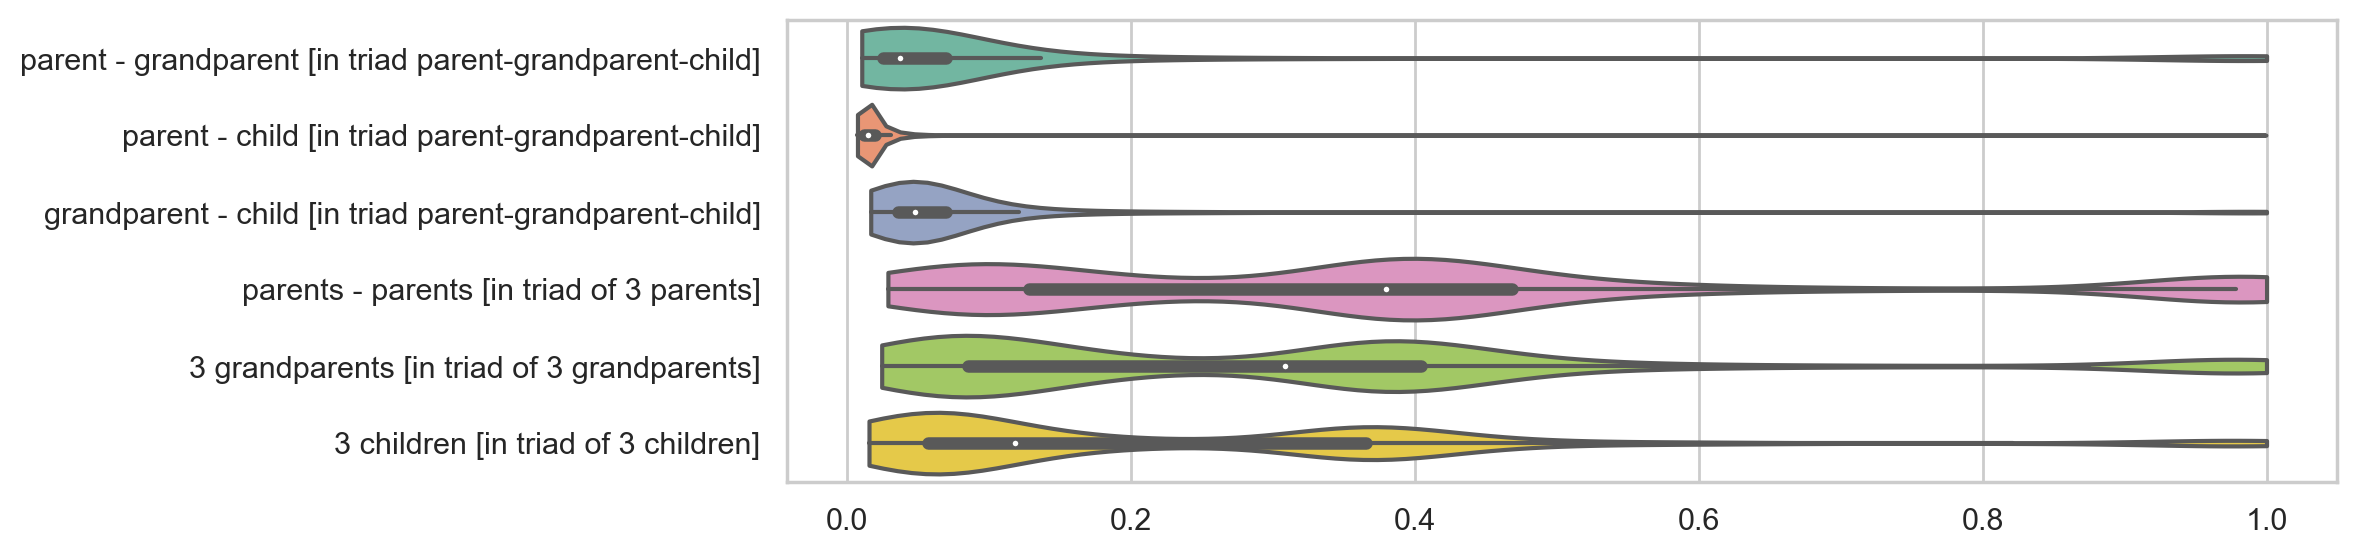

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 3))
ax = sns.violinplot(data=df2, orient='h', palette="Set2",
                    cut=0, width=0.8, scale='width')
plt.savefig('violinplot2.pdf', dpi=300, bbox_inches='tight')
plt.show()


## Dyadic simulation

In [23]:
def simulation2(freq1, freq2, coupling1, coupling2):
    t0, t1, dt = 0, 60, 0.01
    T = np.arange(t0, t1, dt)
    W = [2*np.pi*freq1,
         2*np.pi*freq2]
    K = np.array([[0.0, coupling1],
                  [coupling2, 0.0]])
    Y0 = np.random.rand(len(W))*2*np.pi
    init_params = {'W': W, 'K': K, 'Y0': Y0}
    kuramoto = Kuramoto(init_params)
    kuramoto.noise = 'normal'
    odePhi = kuramoto.solve(T)
    odeT = T[:-1]
    return np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[1])))) / len(odePhi[0])

results3 = []
for sim in trange(nsim):
    adt_old = simulation2(freq1=np.random.randn()+12, freq2=np.random.randn()+10, coupling1=0.9, coupling2=0.7)
    adt_kid = simulation2(freq1=np.random.randn()+12, freq2=np.random.randn()+7, coupling1=0.9, coupling2=0.5)
    old_kid = simulation2(freq1=np.random.randn()+10, freq2=np.random.randn()+7, coupling1=0.7, coupling2=0.5)
    results3.append([adt_old, adt_kid, old_kid])

df3 = pd.DataFrame(results3, columns=['parent - grandparent [in dyad]',
                                      'parent - child [in dyad]',
                                      'grandparent - child [in dyad]'])

100%|██████████| 2000/2000 [2:51:34<00:00,  5.15s/it]  


/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


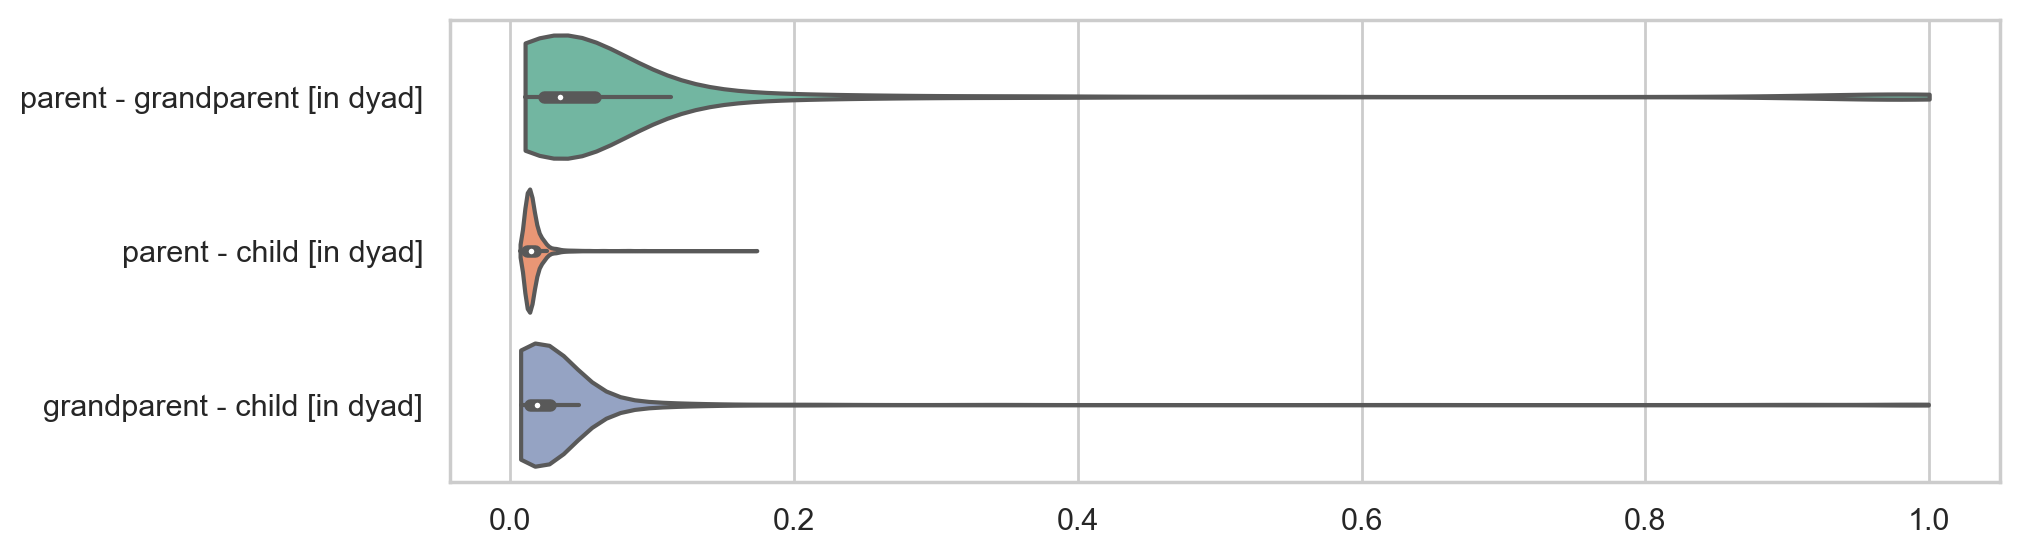

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 3))
ax = sns.violinplot(data=df3, orient='h', palette="Set2",
                    cut=0, width=0.8, scale='width')
plt.savefig('violinplot3.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [25]:
df1.describe()

,parent - grandparent [in triad parent-grandparent-child],parent - child [in triad parent-grandparent-child],grandparent - child [in triad parent-grandparent-child],parents - parents [in triad of 3 parents],3 grandparents [in triad of 3 grandparents],3 children [in triad of 3 children]
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.029639,0.020754,0.274969,0.399561,0.315302,0.222479
std,0.069529,0.039376,0.324623,0.297186,0.267297,0.223136
min,0.008709,0.006526,0.021655,0.034164,0.025437,0.015520
25%,0.016218,0.012598,0.074153,0.131300,0.088316,0.054136
50%,0.021275,0.015677,0.124966,0.381601,0.338759,0.109748
75%,0.028265,0.022656,0.270631,0.476440,0.405947,0.366511
max,0.999776,0.999573,0.999993,0.999987,0.999998,0.999979


In [26]:
df3.describe()

,parent - grandparent [in dyad],parent - child [in dyad],grandparent - child [in dyad]
count,2000.000000,2000.000000,2000.000000
mean,0.095447,0.016068,0.039170
std,0.198888,0.007565,0.106816
min,0.010627,0.007118,0.007498
25%,0.023829,0.012154,0.014314
50%,0.035491,0.014518,0.018813
75%,0.060029,0.017763,0.028024
max,0.999992,0.173854,0.999384


In [7]:
import scipy as sp
from scipy import stats

# cohen d effect size


def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)


In [27]:
# compare 2 groups
print(sp.stats.ttest_ind(df3['parent - child [in dyad]'], df3['grandparent - child [in dyad]']))
print(sp.stats.ttest_ind(df3['parent - grandparent [in dyad]'], df3['grandparent - child [in dyad]']))
print(sp.stats.ttest_ind(df3['parent - grandparent [in dyad]'], df3['parent - child [in dyad]']))

# compare 2 groups
print(cohen_d(df3['parent - child [in dyad]'], df3['grandparent - child [in dyad]']))
print(cohen_d(df3['parent - grandparent [in dyad]'], df3['grandparent - child [in dyad]']))
print(cohen_d(df3['parent - grandparent [in dyad]'], df3['parent - child [in dyad]']))

Ttest_indResult(statistic=-9.647975850960549, pvalue=8.64631571473628e-22)
Ttest_indResult(statistic=11.148187137546419, pvalue=1.9115839778027972e-28)
Ttest_indResult(statistic=17.83594932224097, pvalue=1.5757162520980634e-68)
-0.3050957849933656
0.3525366313643951
0.5640222408961797


In [28]:
# compare 2 groups
print(cohen_d(df1['parent - child [in triad parent-grandparent-child]'], df1['grandparent - child [in triad parent-grandparent-child]']))
print(cohen_d(df1['parent - grandparent [in triad parent-grandparent-child]'], df1['grandparent - child [in triad parent-grandparent-child]']))
print(cohen_d(df1['parent - grandparent [in triad parent-grandparent-child]'], df1['parent - child [in triad parent-grandparent-child]']))

-1.0994230766752955
-1.045072344048365
0.15725139537109067


In [29]:
# compare 2 groups
print(cohen_d(df2['parent - child [in triad parent-grandparent-child]'], df2['grandparent - child [in triad parent-grandparent-child]']))
print(cohen_d(df2['parent - grandparent [in triad parent-grandparent-child]'], df2['grandparent - child [in triad parent-grandparent-child]']))
print(cohen_d(df2['parent - grandparent [in triad parent-grandparent-child]'], df2['parent - child [in triad parent-grandparent-child]']))

-0.6139545378824592
0.18393273736721483
0.5906209580096599


In [5]:
def simulation2(freq1, freq2, coupling1, coupling2):
    t0, t1, dt = 0, 60, 0.01
    T = np.arange(t0, t1, dt)
    W = [2*np.pi*freq1,
         2*np.pi*freq2]
    K = np.array([[0.0, coupling1],
                  [coupling2, 0.0]])
    Y0 = np.random.rand(len(W))*2*np.pi
    init_params = {'W': W, 'K': K, 'Y0': Y0}
    kuramoto = Kuramoto(init_params)
    kuramoto.noise = 'normal'
    odePhi = kuramoto.solve(T)
    odeT = T[:-1]
    return np.abs(np.sum(np.exp(1j * (odePhi[0] - odePhi[1])))) / len(odePhi[0])


results4 = []
for sim in trange(nsim):
    adt_adt = simulation2(freq1=np.random.randn()+12, freq2=np.random.randn()+12, coupling1=0.9, coupling2=0.9)
    old_old = simulation2(freq1=np.random.randn()+10, freq2=np.random.randn()+10, coupling1=0.7, coupling2=0.7)
    kid_kid = simulation2(freq1=np.random.randn()+7, freq2=np.random.randn()+7, coupling1=0.5, coupling2=0.5)
    results4.append([adt_adt, old_old, kid_kid])

df4 = pd.DataFrame(results4, columns=['parent - parent [in dyad]',
                                      'grandparent - grandparent [in dyad]',
                                      'child - child [in dyad]'])

100%|██████████| 2000/2000 [4:48:36<00:00,  8.66s/it]     


/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


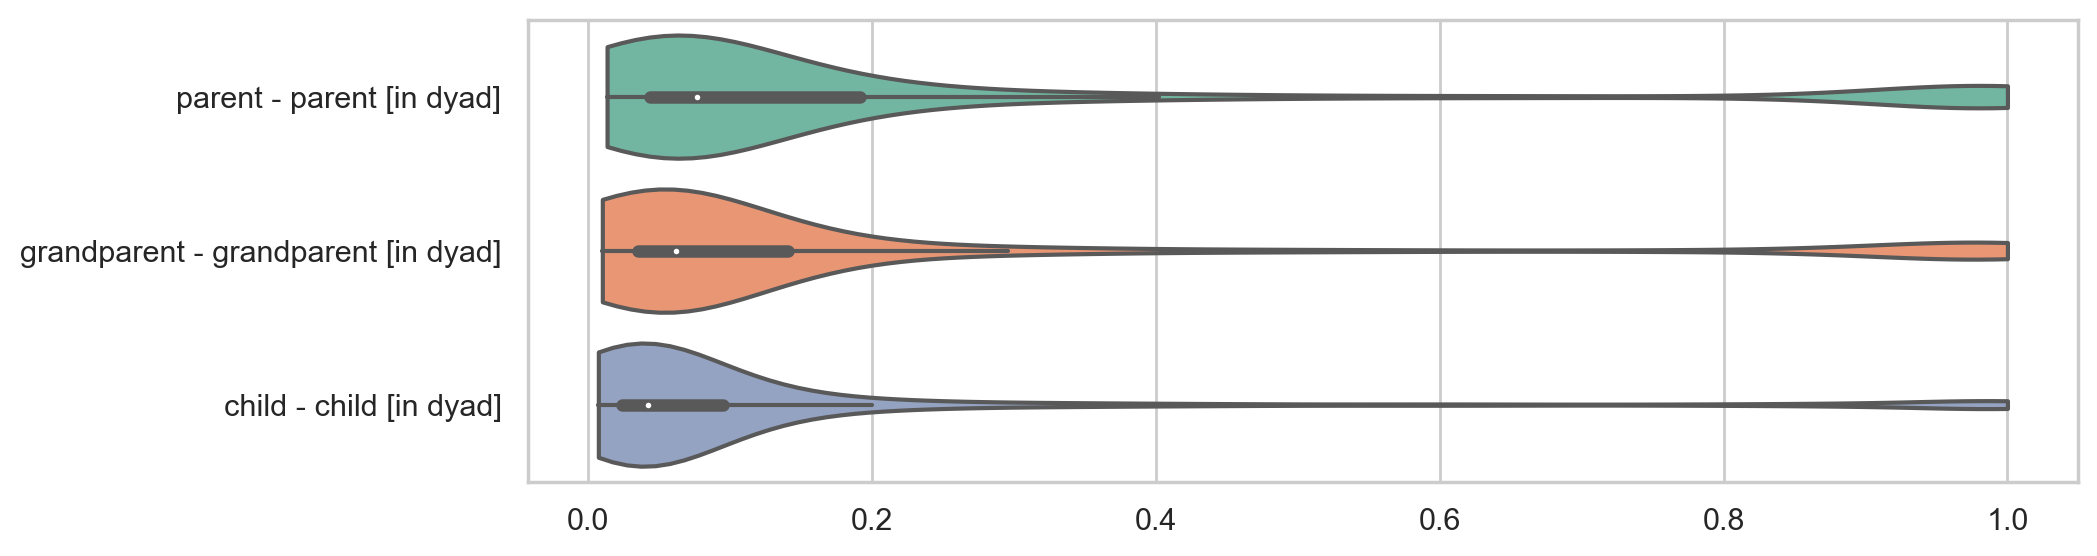

0.10605685969817981
0.22642200326922918
0.33562913362883146


In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 3))
ax = sns.violinplot(data=df4, orient='h', palette="Set2",
                    cut=0, width=0.8, scale='width')
plt.savefig('violinplot4.pdf', dpi=300, bbox_inches='tight')
plt.show()

# compare 2 groups
print(cohen_d(df4['parent - parent [in dyad]'], df4['grandparent - grandparent [in dyad]']))
print(cohen_d(df4['grandparent - grandparent [in dyad]'], df4['child - child [in dyad]']))
print(cohen_d(df4['parent - parent [in dyad]'], df4['child - child [in dyad]']))